In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
dirtydatapath='dirty-dataset.csv'
titlespath='netflix_titles.csv'
dirtydata= pd.read_csv(dirtydatapath)
titles= pd.read_csv(titlespath)
dirtydata.head()

,id|name|surname|date|city|harcama
0,1|John---Doe||2022-01-15|New York|70
1,2|Alice//Smith||2022/02/20|Los Angeles|85.0000
2,3|Alice//Smith@||01/03/2022|Chicago|120
3,4|Bob Doe||2022-04-10||80.0000
4,5|Alice Doe||2022-05-25|Miami|100


In [3]:
dirtydataset_delimated = pd.read_csv(dirtydatapath, delimiter='|', engine='python')

dirtydataset_delimated.head()

,id,name,surname,date,city,harcama
0,1,John---Doe,NaN,2022-01-15,New York,70.0
1,2,Alice//Smith,NaN,2022/02/20,Los Angeles,85.0
2,3,Alice//Smith@,NaN,01/03/2022,Chicago,120.0
3,4,Bob Doe,NaN,2022-04-10,NaN,80.0
4,5,Alice Doe,NaN,2022-05-25,Miami,100.0


In [4]:
dirtydataset_delimated['name'] = dirtydataset_delimated['name'].str.replace(r'[^a-zA-Z]', '', regex=True)
dirtydataset_delimated['city'] = dirtydataset_delimated['city'].str.replace(r'[^a-zA-Z]', '', regex=True)
dirtydataset_delimated

,id,name,surname,date,city,harcama
0,1,JohnDoe,NaN,2022-01-15,NewYork,70.0
1,2,AliceSmith,NaN,2022/02/20,LosAngeles,85.0
2,3,AliceSmith,NaN,01/03/2022,Chicago,120.0
3,4,BobDoe,NaN,2022-04-10,NaN,80.0
4,5,AliceDoe,NaN,2022-05-25,Miami,100.0
...,...,...,...,...,...,...
76,46,LiamMayson,NaN,2023-04-10,LosAngeles,65.0
77,47,SophiaMayson,NaN,2023-05-25,Miami,100.0
78,48,JacksonMayson,NaN,2023-06-30,SanFrancisco,110.0
79,49,EmmaJohnson,NaN,2023-07-15,Boston,75.0


In [5]:
dirtydataset_delimated.drop("surname", axis=1)

,id,name,date,city,harcama
0,1,JohnDoe,2022-01-15,NewYork,70.0
1,2,AliceSmith,2022/02/20,LosAngeles,85.0
2,3,AliceSmith,01/03/2022,Chicago,120.0
3,4,BobDoe,2022-04-10,NaN,80.0
4,5,AliceDoe,2022-05-25,Miami,100.0
...,...,...,...,...,...
76,46,LiamMayson,2023-04-10,LosAngeles,65.0
77,47,SophiaMayson,2023-05-25,Miami,100.0
78,48,JacksonMayson,2023-06-30,SanFrancisco,110.0
79,49,EmmaJohnson,2023-07-15,Boston,75.0


In [6]:
import re
namesurnamelist=[]
# Iterate through each string in the list
for s in range(0,dirtydataset_delimated["name"].size):
    # Use regex to split on capitalized letters
    parts = re.findall(r'[A-Z][^A-Z]*', dirtydataset_delimated["name"][s])
    # Print each part
    namesurnamelist.append(parts)

In [7]:
namelist = [a[0] for a in namesurnamelist]
surnamelist=[]
for a in namesurnamelist:
    surnamelist.append(' '.join(a[1:]))


In [8]:
for a in range(0,len(surnamelist)):
    if surnamelist[a] == '':
        surnamelist[a] = pd.NA

In [9]:
dirtydataset_delimated["name"]=namelist
dirtydataset_delimated["surname"]=surnamelist

In [10]:
listdate=[]
for a in dirtydataset_delimated["date"]:
    listdate.append(a)

for a in listdate:
    if type(a) is not pd.Timestamp:
        if "/" in a:
            print(listdate.index(a),a)
            


1 2022/02/20
2 01/03/2022
1 2022/02/20
2 01/03/2022
2 01/03/2022
2 01/03/2022
2 01/03/2022
2 01/03/2022
2 01/03/2022


In [11]:
for a in range(0,dirtydataset_delimated["date"].size):
    if dirtydataset_delimated["date"][a] == "2022/02/20":
        dirtydataset_delimated["date"][a] = pd.Timestamp(year=2022,month=2,day=20)
    if dirtydataset_delimated["date"][a] == "01/03/2022":
        dirtydataset_delimated["date"][a] = pd.Timestamp(year=2022,month=3,day=1)
        
dirtydataset_delimated['date'] = pd.to_datetime(dirtydataset_delimated['date'], errors='coerce', dayfirst=False)
print(dirtydataset_delimated['date'])

0    2022-01-15
1    2022-02-20
2    2022-03-01
3    2022-04-10
4    2022-05-25
        ...    
76   2023-04-10
77   2023-05-25
78   2023-06-30
79   2023-07-15
80   2023-08-20
Name: date, Length: 81, dtype: datetime64[ns]


C:\Users\xxtra\AppData\Local\Temp\ipykernel_27576\1645695045.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dirtydataset_delimated["date"][a] = pd.Timestamp(year=2022,month=2,day=20)
C:\Users\xxtra\AppData\Local\Temp\ipykernel_27576\164

In [12]:
dirtydataset_delimated.head()

,id,name,surname,date,city,harcama
0,1,John,Doe,2022-01-15,NewYork,70.0
1,2,Alice,Smith,2022-02-20,LosAngeles,85.0
2,3,Alice,Smith,2022-03-01,Chicago,120.0
3,4,Bob,Doe,2022-04-10,NaN,80.0
4,5,Alice,Doe,2022-05-25,Miami,100.0


<Axes: >

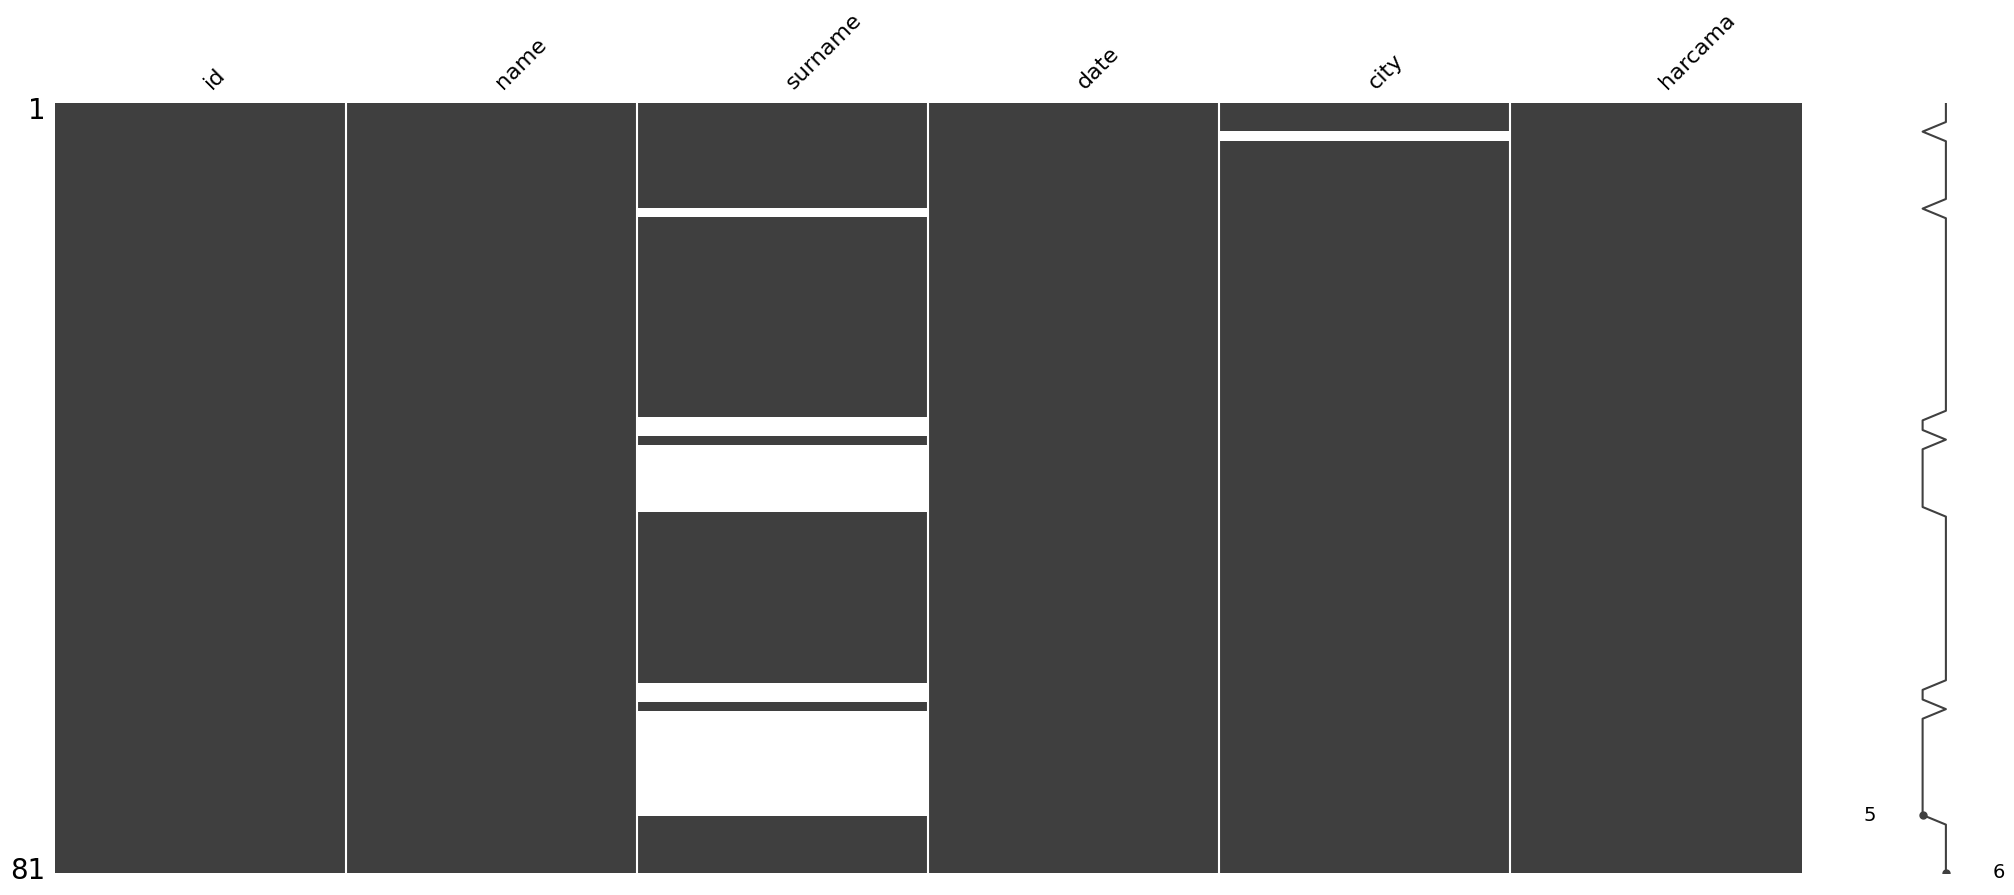

In [13]:
msno.matrix(dirtydataset_delimated)